1. Business Problem Understanding
2. Data Acquisition
3. Data Preparation
4. EDA
5. Feature Engineering
6. Model Selection and Building

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfu = pd.read_csv("Case Study 2 - Loan Prediction/Urban_loans.csv")
dfu.head()

,Loan_ID,Gender,Married,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Approved
0,L1,M,Yes,NaN,Grad,2600,0,115.0,NaN,3500,Yes,Y
1,L2,M,Yes,0.0,Grad,5649,1,44.0,360.0,0,Yes,Y
2,L3,M,Yes,0.0,Grad,3988,1,50.0,240.0,0,Yes,Y
3,L4,M,Yes,1.0,Grad,3316,2,88.0,360.0,3500,Yes,Y
4,L5,NaN,Yes,0.0,Grad,51763,3+,700.0,300.0,0,Yes,Y


In [3]:
dfs = pd.read_csv("Case Study 2 - Loan Prediction/Semi_Urban_loans.csv")
dfs.head()

,LID,Gender,Applicant_Income,Dependents,Education,Marrital_Status,Self_Employed,LoanAmt,LoanAmountTerm,Coapplicant_Income,Credit_History,Approved
0,Semi76,M,9560,0,G,1.0,Yes,191.0,360,0,1.0,1
1,Semi77,M,1875,2,NG,1.0,Yes,97.0,360,1875,1.0,1
2,Semi78,M,6000,0,G,1.0,No,265.0,360,2250,NaN,0
3,Semi79,M,3748,0,NG,-1.0,No,110.0,360,1668,1.0,1
4,Semi80,F,4166,0,G,-1.0,No,116.0,360,0,0.0,0


In [4]:
dfr = pd.read_csv("Case Study 2 - Loan Prediction/Rural_loans.csv")
dfr.head()

,Loan_ID,Sex,Marrital_Status,DependentsCount,Self_Employed,Education,Loan_Term,LoanAmount,Income,Loan_Status
0,R36,NaN,Yes,2,0.0,NG,360,112.0,3365,No
1,R37,1.0,Yes,1,0.0,NG,180,113.0,2653,No
2,R38,1.0,No,0,0.0,G,360,NaN,3865,Yes
3,R39,1.0,Yes,2,0.0,G,360,185.0,5042,No
4,R40,1.0,Yes,2,0.0,G,360,158.0,4167,Yes


In [5]:
print(dfu.shape, dfs.shape, dfr.shape)

(35, 12) (39, 12) (40, 10)


In [6]:
print(dfu.columns)
print(dfs.columns)
print(dfr.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved'],
      dtype='object')
Index(['LID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'LoanAmt', 'LoanAmountTerm',
       'Coapplicant_Income', 'Credit_History', 'Approved'],
      dtype='object')
Index(['Loan_ID', 'Sex', 'Marrital_Status', 'DependentsCount', 'Self_Employed',
       'Education', 'Loan_Term', 'LoanAmount', 'Income', 'Loan_Status'],
      dtype='object')


### Data Preparation

In [7]:
set(dfu.columns.append(dfs.columns).append(dfr.columns))

{'Applicant_Income',
 'Approved',
 'CoapplicantIncome',
 'Coapplicant_Income',
 'Credit_History',
 'Dependents',
 'DependentsCount',
 'Education',
 'Gender',
 'Income',
 'LID',
 'LoanAmount',
 'LoanAmountTerm',
 'LoanAmt',
 'Loan_Amt',
 'Loan_ID',
 'Loan_Status',
 'Loan_Term',
 'Married',
 'Marrital_Status',
 'Self_Employed',
 'Sex',
 'Tenure'}

Check Unique Values

In [8]:
dfu.Gender.unique()

array(['M', nan, 'F'], dtype=object)

In [9]:
dfu.Married.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
dfu.Self_Employed.unique()

array([nan,  0.,  1.])

In [11]:
cols = ['Gender', 'Married', 'Self_Employed','Education','Credit_History','Approved']

for col in cols:
    print(col,dfu[col].unique())
    print("------------------")

Gender ['M' nan 'F']
------------------
Married ['Yes' 'No']
------------------
Self_Employed [nan  0.  1.]
------------------
Education ['Grad' 'NonGrad']
------------------
Credit_History ['Yes' 'No' nan]
------------------
Approved ['Y' 'N']
------------------


In [12]:
cols = ['Gender', 'Marrital_Status', 'Self_Employed','Education','Credit_History','Approved']

for col in cols:
    print(col,dfs[col].unique())
    print("------------------")

Gender ['M' 'F' nan]
------------------
Marrital_Status [ 1. -1. nan]
------------------
Self_Employed ['Yes' 'No' nan]
------------------
Education ['G' 'NG']
------------------
Credit_History [ 1. nan  0.]
------------------
Approved [1 0]
------------------


In [13]:
cols = ['Sex', 'Marrital_Status', 'Self_Employed','Education','Loan_Status']

for col in cols:
    print(col,dfr[col].unique())
    print("------------------")

Sex [nan  1.  0.]
------------------
Marrital_Status ['Yes' 'No']
------------------
Self_Employed [ 0.  1. nan]
------------------
Education ['NG' 'G']
------------------
Loan_Status ['No' 'Yes']
------------------


In [14]:
dfu.columns

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved'],
      dtype='object')

In [15]:
dfu['Property_Location'] = 'URBAN'

In [16]:
dfs['Property_Location'] = 'SEMI_URBAN'
dfr['Property_Location'] = 'RURAL'

In [17]:
dfr.Sex = dfr.Sex.replace({1:"M",0:"F"})

In [18]:
dfs.Marrital_Status.replace({1:"Yes", -1:"No"}, inplace=True)

In [19]:
dfs.Self_Employed.replace({"Yes":1,"No":0},inplace=True)

In [20]:
dfu.Education.replace({"Grad":"G","NonGrad":"NG"},inplace=True)

In [21]:
dfs.Approved.replace({1:"Y",0:"N"},inplace=True)
dfr.Loan_Status.replace({"Yes":"Y","No":"N"},inplace=True)

In [22]:
dfs.Credit_History.replace({1:"Yes",0:"No"},inplace=True)

In [23]:
cols = ['Gender', 'Married', 'Self_Employed','Education','Credit_History','Approved']

for col in cols:
    print(col,dfu[col].unique())
    print("------------------")

Gender ['M' nan 'F']
------------------
Married ['Yes' 'No']
------------------
Self_Employed [nan  0.  1.]
------------------
Education ['G' 'NG']
------------------
Credit_History ['Yes' 'No' nan]
------------------
Approved ['Y' 'N']
------------------


In [24]:
cols = ['Gender', 'Marrital_Status', 'Self_Employed','Education','Credit_History','Approved']

for col in cols:
    print(col,dfs[col].unique())
    print("------------------")

Gender ['M' 'F' nan]
------------------
Marrital_Status ['Yes' 'No' nan]
------------------
Self_Employed [ 1.  0. nan]
------------------
Education ['G' 'NG']
------------------
Credit_History ['Yes' nan 'No']
------------------
Approved ['Y' 'N']
------------------


In [25]:
cols = ['Sex', 'Marrital_Status', 'Self_Employed','Education','Loan_Status']

for col in cols:
    print(col,dfr[col].unique())
    print("------------------")

Sex [nan 'M' 'F']
------------------
Marrital_Status ['Yes' 'No']
------------------
Self_Employed [ 0.  1. nan]
------------------
Education ['NG' 'G']
------------------
Loan_Status ['N' 'Y']
------------------


In [26]:
print(dfu.columns)
print(dfs.columns)
print(dfr.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location'],
      dtype='object')
Index(['LID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'LoanAmt', 'LoanAmountTerm',
       'Coapplicant_Income', 'Credit_History', 'Approved',
       'Property_Location'],
      dtype='object')
Index(['Loan_ID', 'Sex', 'Marrital_Status', 'DependentsCount', 'Self_Employed',
       'Education', 'Loan_Term', 'LoanAmount', 'Income', 'Loan_Status',
       'Property_Location'],
      dtype='object')


In [27]:
dfu.columns = ['Loan_ID', 'Gender', 'Marrital_Status', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location']

dfs.columns = ['Loan_ID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved',
       'Property_Location']

dfr.columns = ['Loan_ID', 'Gender', 'Marrital_Status', 'Dependents', 'Self_Employed',
       'Education', 'Tenure', 'Loan_Amt', 'Applicant_Income', 'Approved',
       'Property_Location']

In [28]:
print(dfu.columns)
print(dfs.columns)
print(dfr.columns)

Index(['Loan_ID', 'Gender', 'Marrital_Status', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Applicant_Income', 'Dependents', 'Education',
       'Marrital_Status', 'Self_Employed', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Marrital_Status', 'Dependents', 'Self_Employed',
       'Education', 'Tenure', 'Loan_Amt', 'Applicant_Income', 'Approved',
       'Property_Location'],
      dtype='object')


In [29]:
dfs = dfs[['Loan_ID', 'Gender','Marrital_Status', 'Self_Employed','Education','Applicant_Income', 'Dependents',
           'Loan_Amt', 'Tenure','CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location']]

dfr['CoapplicantIncome'] = 0
dfr['Credit_History'] = 'No'

dfr = dfr[['Loan_ID', 'Gender', 'Marrital_Status','Self_Employed','Education','Applicant_Income', 'Dependents',
           'Loan_Amt','Tenure','CoapplicantIncome','Credit_History' ,'Approved','Property_Location']]

In [30]:
print(dfu.columns)
print(dfs.columns)
print(dfr.columns)

Index(['Loan_ID', 'Gender', 'Marrital_Status', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Marrital_Status', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Marrital_Status', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location'],
      dtype='object')


### Merge 3 dataframes

In [31]:
merged_df = pd.concat([dfu,dfs,dfr])
merged_df.head()

,Loan_ID,Gender,Marrital_Status,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Approved,Property_Location
0,L1,M,Yes,NaN,G,2600,0,115.0,NaN,3500,Yes,Y,URBAN
1,L2,M,Yes,0.0,G,5649,1,44.0,360.0,0,Yes,Y,URBAN
2,L3,M,Yes,0.0,G,3988,1,50.0,240.0,0,Yes,Y,URBAN
3,L4,M,Yes,1.0,G,3316,2,88.0,360.0,3500,Yes,Y,URBAN
4,L5,NaN,Yes,0.0,G,51763,3+,700.0,300.0,0,Yes,Y,URBAN


## EDA

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
merged_df.Approved.value_counts()

Y    74
N    40
Name: Approved, dtype: int64

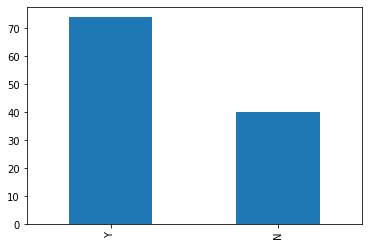

In [34]:
merged_df.Approved.value_counts().plot.bar()

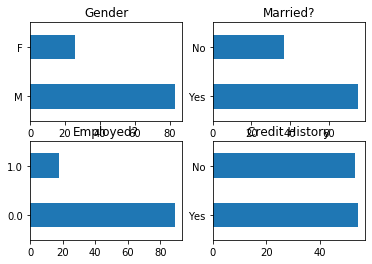

In [35]:
plt.figure(1)

plt.subplot(221)
merged_df['Gender'].value_counts().plot.barh(title="Gender")

plt.subplot(222)
merged_df['Marrital_Status'].value_counts().plot.barh(title="Married?")

plt.subplot(223)
merged_df['Self_Employed'].value_counts().plot.barh(title="Employed?")

plt.subplot(224)
merged_df['Credit_History'].value_counts().plot.barh(title="Credit History")



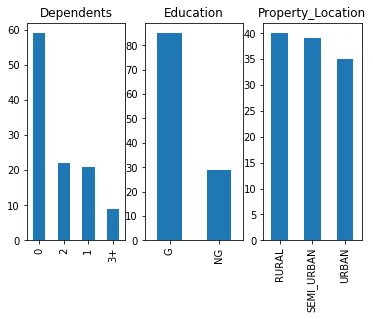

In [36]:
plt.figure(1)

plt.subplot(131)
merged_df.Dependents.value_counts().plot.bar(title="Dependents")

plt.subplot(132)
merged_df.Education.value_counts().plot.bar(title="Education")

plt.subplot(133)
merged_df.Property_Location.value_counts().plot.bar(title="Property_Location")

plt.show()

Bivariate Analysis

In [37]:
gender_ct = pd.crosstab(merged_df.Gender,merged_df.Approved)
gender_ct

Approved,N,Y
Gender,,
F,15,11
M,23,60


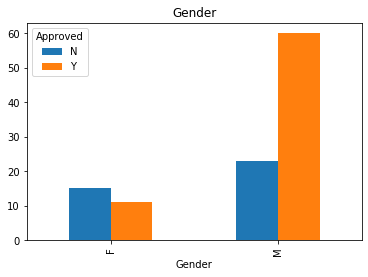

In [38]:
gender_ct.plot.bar(title="Gender")

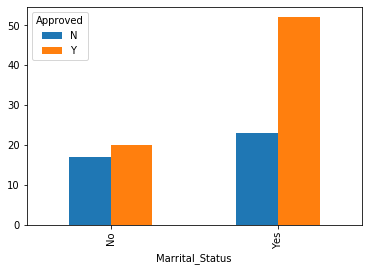

In [39]:
married_ct = pd.crosstab(merged_df.Marrital_Status,merged_df.Approved)
married_ct.plot.bar()

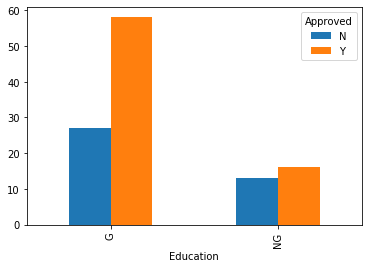

In [40]:
edu_ct = pd.crosstab(merged_df.Education,merged_df.Approved)
edu_ct.plot.bar()

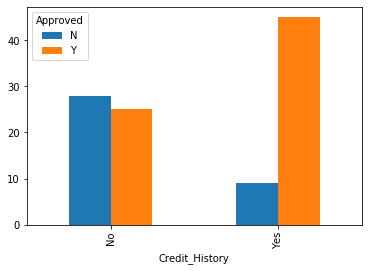

In [41]:
cred_ct = pd.crosstab(merged_df.Credit_History,merged_df.Approved)
cred_ct.plot.bar()

/home/murtuza/anaconda3/envs/idp3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


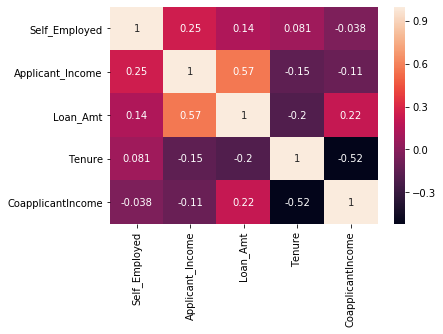

In [42]:
import seaborn as sns
sns.heatmap(merged_df.corr(),annot=True)

## Feature Engineering

#### Missing Values

In [43]:
merged_df.isnull().sum()

Loan_ID              0
Gender               5
Marrital_Status      2
Self_Employed        7
Education            0
Applicant_Income     0
Dependents           3
Loan_Amt             7
Tenure               2
CoapplicantIncome    0
Credit_History       7
Approved             0
Property_Location    0
dtype: int64

In [44]:
merged_df['Gender'] = merged_df['Gender'].fillna(merged_df['Gender'].mode()[0])
merged_df['Marrital_Status'] = merged_df['Marrital_Status'].fillna(merged_df['Marrital_Status'].mode()[0])
merged_df['Self_Employed'] = merged_df['Self_Employed'].fillna(merged_df['Self_Employed'].mode()[0])
merged_df['Dependents'] = merged_df['Dependents'].fillna(merged_df['Dependents'].mode()[0])
merged_df['Tenure'] = merged_df['Tenure'].fillna(merged_df['Tenure'].mode()[0])
merged_df['Credit_History'] = merged_df['Credit_History'].fillna(merged_df['Credit_History'].mode()[0])

In [45]:
merged_df['Loan_Amt'] = merged_df['Loan_Amt'].fillna(merged_df['Loan_Amt'].median())

## Handling Outliers

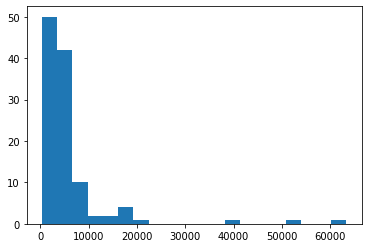

In [46]:
merged_df['Applicant_Income'].hist(bins=20,grid=False)

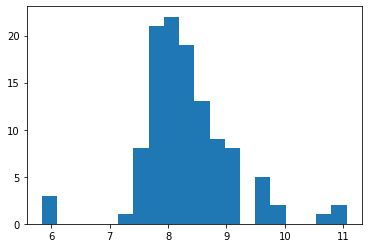

In [47]:
merged_df['Applicant_Income_Log'] = np.log(merged_df['Applicant_Income'])

merged_df['Applicant_Income_Log'].hist(bins=20,grid=False)

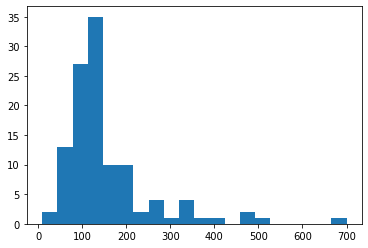

In [48]:
merged_df['Loan_Amt'].hist(bins=20,grid=False)

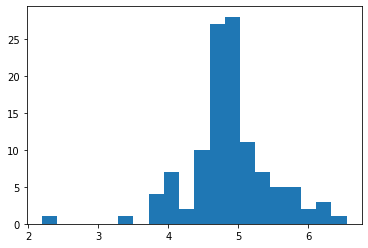

In [49]:
merged_df['Loan_Amt_Log'] = np.log(merged_df['Loan_Amt'])

merged_df['Loan_Amt_Log'].hist(bins=20,grid=False)

In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               114 non-null    object 
 1   Gender                114 non-null    object 
 2   Marrital_Status       114 non-null    object 
 3   Self_Employed         114 non-null    float64
 4   Education             114 non-null    object 
 5   Applicant_Income      114 non-null    int64  
 6   Dependents            114 non-null    object 
 7   Loan_Amt              114 non-null    float64
 8   Tenure                114 non-null    float64
 9   CoapplicantIncome     114 non-null    int64  
 10  Credit_History        114 non-null    object 
 11  Approved              114 non-null    object 
 12  Property_Location     114 non-null    object 
 13  Applicant_Income_Log  114 non-null    float64
 14  Loan_Amt_Log          114 non-null    float64
dtypes: float64(5), int64(2),

#### DataType Conversion

In [51]:
merged_df.columns

Index(['Loan_ID', 'Gender', 'Marrital_Status', 'Self_Employed', 'Education',
       'Applicant_Income', 'Dependents', 'Loan_Amt', 'Tenure',
       'CoapplicantIncome', 'Credit_History', 'Approved', 'Property_Location',
       'Applicant_Income_Log', 'Loan_Amt_Log'],
      dtype='object')

In [52]:
merged_df = merged_df.astype({'Gender':'category', 'Marrital_Status':'category', 'Self_Employed':'category', 
                              'Education':'category', 'Dependents':'category', 'Credit_History':'category', 
                               'Approved':'category', 'Property_Location':'category'})

In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Loan_ID               114 non-null    object  
 1   Gender                114 non-null    category
 2   Marrital_Status       114 non-null    category
 3   Self_Employed         114 non-null    category
 4   Education             114 non-null    category
 5   Applicant_Income      114 non-null    int64   
 6   Dependents            114 non-null    category
 7   Loan_Amt              114 non-null    float64 
 8   Tenure                114 non-null    float64 
 9   CoapplicantIncome     114 non-null    int64   
 10  Credit_History        114 non-null    category
 11  Approved              114 non-null    category
 12  Property_Location     114 non-null    category
 13  Applicant_Income_Log  114 non-null    float64 
 14  Loan_Amt_Log          114 non-null    float64 
dtypes: cate

#### Feature Creation

In [54]:
merged_df['TotalIncome'] = merged_df['Applicant_Income'] + merged_df['CoapplicantIncome']

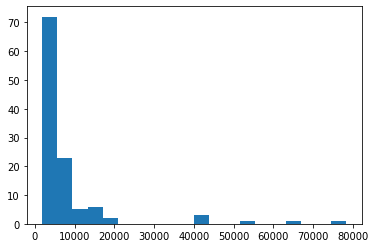

In [55]:
merged_df['TotalIncome'].hist(bins=20,grid=False)

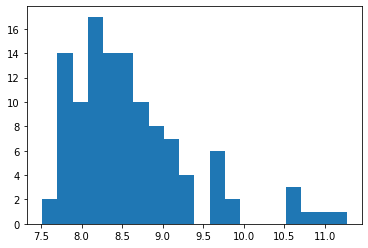

In [56]:
merged_df['TotalIncome_Log'] = np.log(merged_df['TotalIncome'])
merged_df['TotalIncome_Log'].hist(bins=20,grid=False)

In [57]:
merged_df['EMI'] = merged_df['Loan_Amt']/merged_df['Tenure']

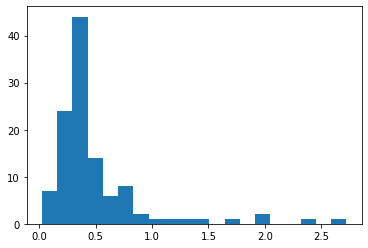

In [58]:
merged_df['EMI'].hist(bins=20,grid=False)

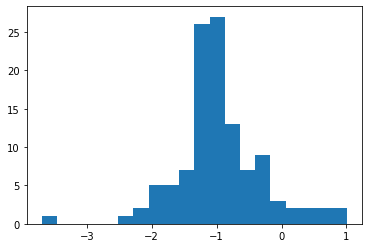

In [59]:
merged_df['EMI_Log'] = np.log(merged_df['EMI'])
merged_df['EMI_Log'].hist(bins=20,grid=False)

In [60]:
merged_df['EMI']

0     0.319444
1     0.122222
2     0.208333
3     0.244444
4     2.333333
        ...   
35    0.263889
36    0.350000
37    0.350000
38    0.733333
39    0.586111
Name: EMI, Length: 114, dtype: float64

In [61]:
merged_df

,Loan_ID,Gender,Marrital_Status,Self_Employed,Education,Applicant_Income,Dependents,Loan_Amt,Tenure,CoapplicantIncome,Credit_History,Approved,Property_Location,Applicant_Income_Log,Loan_Amt_Log,TotalIncome,TotalIncome_Log,EMI,EMI_Log
0,L1,M,Yes,0.0,G,2600,0,115.0,360.0,3500,Yes,Y,URBAN,7.863267,4.744932,6100,8.716044,0.319444,-1.141172
1,L2,M,Yes,0.0,G,5649,1,44.0,360.0,0,Yes,Y,URBAN,8.639234,3.784190,5649,8.639234,0.122222,-2.101914
2,L3,M,Yes,0.0,G,3988,1,50.0,240.0,0,Yes,Y,URBAN,8.291045,3.912023,3988,8.291045,0.208333,-1.568616
3,L4,M,Yes,1.0,G,3316,2,88.0,360.0,3500,Yes,Y,URBAN,8.106515,4.477337,6816,8.827028,0.244444,-1.408767
4,L5,M,Yes,0.0,G,51763,3+,700.0,300.0,0,Yes,Y,URBAN,10.854431,6.551080,51763,10.854431,2.333333,0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,R71,F,No,0.0,NG,3400,0,95.0,360.0,0,No,N,RURAL,8.131531,4.553877,3400,8.131531,0.263889,-1.332227
36,R72,M,No,0.0,NG,2550,0,126.0,360.0,0,No,Y,RURAL,7.843849,4.836282,2550,7.843849,0.350000,-1.049822
37,R73,M,Yes,0.0,NG,2492,1,126.0,360.0,0,No,Y,RURAL,7.820841,4.836282,2492,7.820841,0.350000,-1.049822
38,R74,M,Yes,0.0,G,3593,0,132.0,180.0,0,No,N,RURAL,8.186743,4.882802,3593,8.186743,0.733333,-0.310155


In [62]:
merged_df['TotalIncome'].max()

78345

In [63]:
merged_df['BalanceIncome'] = merged_df['TotalIncome'] - (merged_df['EMI']*1000)

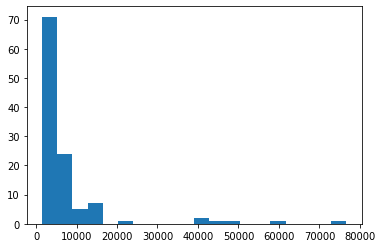

In [64]:
merged_df['BalanceIncome'].hist(bins=20,grid=False)

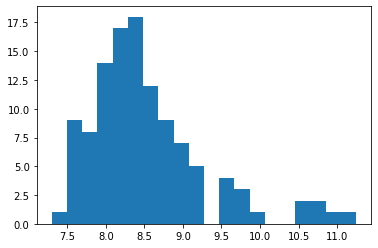

In [65]:
merged_df['BalanceIncome_Log'] = np.log(merged_df['BalanceIncome'])
merged_df['BalanceIncome_Log'].hist(bins=20,grid=False)

In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Loan_ID               114 non-null    object  
 1   Gender                114 non-null    category
 2   Marrital_Status       114 non-null    category
 3   Self_Employed         114 non-null    category
 4   Education             114 non-null    category
 5   Applicant_Income      114 non-null    int64   
 6   Dependents            114 non-null    category
 7   Loan_Amt              114 non-null    float64 
 8   Tenure                114 non-null    float64 
 9   CoapplicantIncome     114 non-null    int64   
 10  Credit_History        114 non-null    category
 11  Approved              114 non-null    category
 12  Property_Location     114 non-null    category
 13  Applicant_Income_Log  114 non-null    float64 
 14  Loan_Amt_Log          114 non-null    float64 
 15  TotalIn

In [67]:
merged_df.drop(['Loan_ID','Applicant_Income','CoapplicantIncome','Loan_Amt','Tenure','TotalIncome','EMI','BalanceIncome'],
               axis=1, inplace=True)

In [68]:
merged_df.columns

Index(['Gender', 'Marrital_Status', 'Self_Employed', 'Education', 'Dependents',
       'Credit_History', 'Approved', 'Property_Location',
       'Applicant_Income_Log', 'Loan_Amt_Log', 'TotalIncome_Log', 'EMI_Log',
       'BalanceIncome_Log'],
      dtype='object')